# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv('clustering_kesejahteraan_masyarakat.csv')
data.head()

,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng,Cluster
0,ACEH,2015,11226,1900000.0,MAKANAN,PERKOTAAN,MARET,293697.0,466355.0,Rentan Miskin
1,ACEH,2015,11226,1900000.0,MAKANAN,PERKOTAAN,SEPTEMBER,302128.0,466355.0,Rentan Miskin
2,ACEH,2015,11226,1900000.0,MAKANAN,PERDESAAN,MARET,297479.0,395136.0,Rentan Miskin
3,ACEH,2015,11226,1900000.0,MAKANAN,PERDESAAN,SEPTEMBER,306737.0,395136.0,Rentan Miskin
4,ACEH,2015,11226,1900000.0,MAKANAN,PERDESAANPERKOTAAN,MARET,296406.0,415354.0,Rentan Miskin


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4905 non-null   object 
 1   tahun     4905 non-null   int64  
 2   upah      4905 non-null   int64  
 3   ump       4905 non-null   float64
 4   jenis     4905 non-null   object 
 5   daerah    4905 non-null   object 
 6   periode   4905 non-null   object 
 7   gk        4905 non-null   float64
 8   peng      4905 non-null   float64
 9   Cluster   4905 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 383.3+ KB


In [4]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()
 
# List kolom kategorikal yang perlu di-encode
categorical_columns = ['provinsi', 'jenis', 'daerah', 'periode', 'Cluster']
 
# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
 
# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data.sample(10)

,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng,Cluster
4548,25,2015,17313,2015000.0,0,0,1,374902.0,463880.0,1
2012,11,2018,12561,1508895.0,0,0,0,272436.0,436818.0,1
2027,11,2018,12561,1508895.0,2,1,1,384750.0,1006077.0,1
929,3,2018,14353,1888741.0,1,1,1,125225.0,558899.0,1
3446,31,2017,17112,2598000.0,2,1,1,336403.0,1106712.0,2
3088,13,2021,18874,2399698.0,2,1,0,519150.0,1383800.0,2
4390,20,2022,17006,2619313.0,1,2,1,187267.0,787907.0,0
256,34,2021,15486,2499423.0,0,1,0,395104.0,607811.0,1
1453,5,2016,23181,3100000.0,0,2,1,334938.0,692206.0,0
200,34,2018,13257,2132189.0,0,0,0,333843.0,519512.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4905 non-null   int64  
 1   tahun     4905 non-null   int64  
 2   upah      4905 non-null   int64  
 3   ump       4905 non-null   float64
 4   jenis     4905 non-null   int64  
 5   daerah    4905 non-null   int64  
 6   periode   4905 non-null   int64  
 7   gk        4905 non-null   float64
 8   peng      4905 non-null   float64
 9   Cluster   4905 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 383.3 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
 
# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
 
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']
 
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3433, 9), y_train=(3433,)
Test set shape: X_test=(1472, 9), y_test=(1472,)


In [7]:
y_train = y_train.ravel()
y_test = y_test.ravel()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_17592\4217289235.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\Pongo\AppData\Local\Temp\ipykernel_17592\4217289235.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


In [8]:
# Pastikan y dalam format integer dan array 1D
y_train = y_train.astype(int).ravel()
y_test = y_test.astype(int).ravel()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### KNN

==== KNN Classifier ====
Confusion Matrix:
[[1070   32]
 [  36  334]]
True Positive (TP): 334
False Positive (FP): 32
False Negative (FN): 36
True Negative (TN): 1070

Accuracy training set: 0.9770
Precision training set: 0.9639
Recall training set: 0.9424
F1-Score training set: 0.9531

Accuracy: 0.9538
Precision: 0.9126
Recall: 0.9027
F1-Score: 0.9076

----------------------------------------



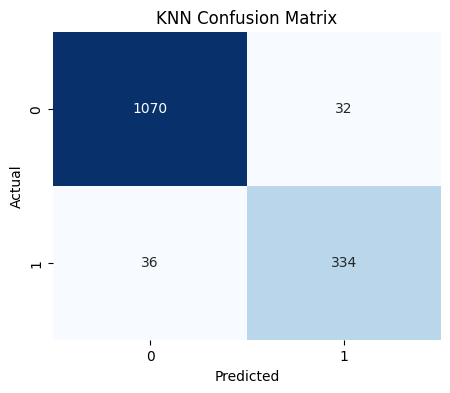

In [10]:
y_pred_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}\n")
print(f"Accuracy training set: {accuracy_score(y_train, y_train_knn):.4f}")
print(f"Precision training set: {precision_score(y_train, y_train_knn):.4f}")
print(f"Recall training set: {recall_score(y_train, y_train_knn):.4f}")
print(f"F1-Score training set: {f1_score(y_train, y_train_knn):.4f}\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

==== Decision Tree Classifier ====
Confusion Matrix:
[[1087   15]
 [  11  359]]
True Positive (TP): 359
False Positive (FP): 15
False Negative (FN): 11
True Negative (TN): 1087

Accuracy training set: 1.0000
Precision training set: 1.0000
Recall training set: 1.0000
F1-Score training set: 1.0000

Accuracy: 0.9823
Precision: 0.9599
Recall: 0.9703
F1-Score: 0.9651

----------------------------------------



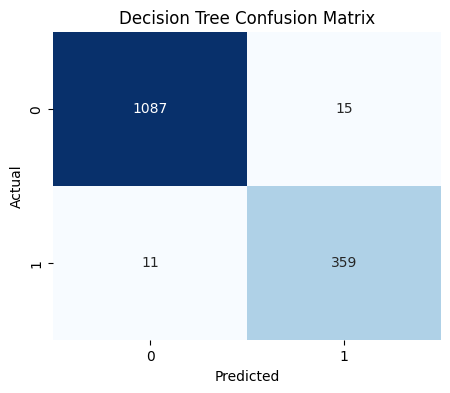

In [11]:
y_pred_dt = dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}\n")
print(f"Accuracy training set: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Precision training set: {precision_score(y_train, y_train_pred_dt):.4f}")
print(f"Recall training set: {recall_score(y_train, y_train_pred_dt):.4f}")
print(f"F1-Score training set: {f1_score(y_train, y_train_pred_dt):.4f}\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

==== Random Forest Classifier ====
Confusion Matrix:
[[1086   16]
 [   6  364]]
True Positive (TP): 364
False Positive (FP): 16
False Negative (FN): 6
True Negative (TN): 1086

Accuracy train Set: 1.0000
Precision train Set: 1.0000
Recall train Set: 1.0000
F1-Score train Set: 1.0000

Accuracy Test set: 0.9851
Precision Test set: 0.9579
Recall Test set: 0.9838
F1-Score Test set: 0.9707

----------------------------------------



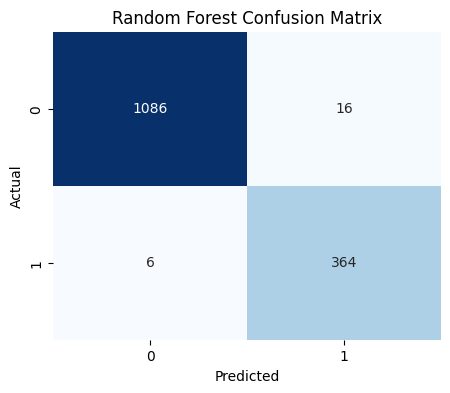

In [12]:
# Random Forest
y_pred_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}\n")
print(f"Accuracy train Set: {accuracy_score(y_train, y_train_rf):.4f}")
print(f"Precision train Set: {precision_score(y_train, y_train_rf):.4f}")
print(f"Recall train Set: {recall_score(y_train, y_train_rf):.4f}")
print(f"F1-Score train Set: {f1_score(y_train, y_train_rf):.4f}\n")
print(f"Accuracy Test set: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision Test set: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall Test set: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score Test set: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### SVM

==== SVM Classifier ====
Confusion Matrix:
[[1077   25]
 [  18  352]]
True Positive (TP): 352
False Positive (FP): 25
False Negative (FN): 18
True Negative (TN): 1077

Accuracy training set: 0.9764
Precision training set: 0.9684
Recall training set: 0.9354
F1-Score training set: 0.9516

Accuracy: 0.9708
Precision: 0.9337
Recall: 0.9514
F1-Score: 0.9424

----------------------------------------



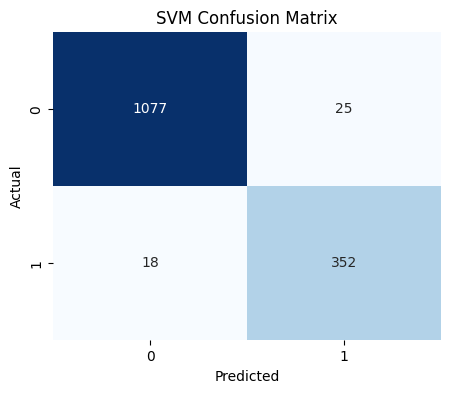

In [13]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
y_train_pred_svm = svm.predict(X_train)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}\n")
print(f"Accuracy training set: {accuracy_score(y_train, y_train_pred_svm):.4f}")
print(f"Precision training set: {precision_score(y_train, y_train_pred_svm):.4f}")
print(f"Recall training set: {recall_score(y_train, y_train_pred_svm):.4f}")
print(f"F1-Score training set: {f1_score(y_train, y_train_pred_svm):.4f}\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Naive Bayes

==== Naive Bayes Classifier ====
Confusion Matrix:
[[1050   52]
 [  24  346]]
True Positive (TP): 346
False Positive (FP): 52
False Negative (FN): 24
True Negative (TN): 1050

Accuracy training set: 0.9525
Precision training set: 0.8963
Recall training set: 0.9142
F1-Score training set: 0.9052

Accuracy: 0.9484
Precision: 0.8693
Recall: 0.9351
F1-Score: 0.9010

----------------------------------------



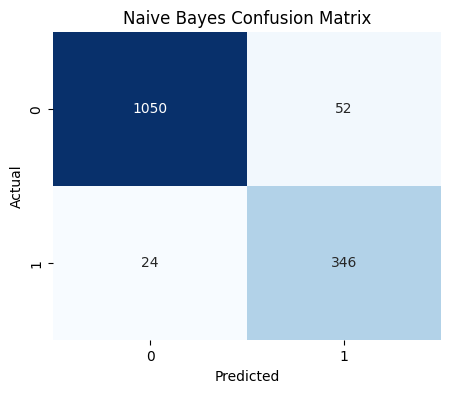

In [14]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
y_train_pred_bayes = nb.predict(X_train)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}\n")
print(f"Accuracy training set: {accuracy_score(y_train, y_train_pred_bayes):.4f}")
print(f"Precision training set: {precision_score(y_train, y_train_pred_bayes):.4f}")
print(f"Recall training set: {recall_score(y_train, y_train_pred_bayes):.4f}")
print(f"F1-Score training set: {f1_score(y_train, y_train_pred_bayes):.4f}\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Rangkuman Hasil

In [15]:
# Fungsi untuk mengevaluasi hasil dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp, = cm.ravel()
    results = {
        'Confusion Matrix': cm, 
        'True Positive (TP)': tp,
        'False Positive': fp,
        'False Negative': fn,
        'True Negative': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya 
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
}

# Buat DataFrame untuk meringkas hasil 
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
    })

# konversi daftar dictionary ke DataFrame 
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.953804   0.912568  0.902703  0.907609
1            Decision Tree (DT)  0.982337   0.959893  0.970270  0.965054
2            Random Forest (RF)  0.985054   0.957895  0.983784  0.970667
3  Support Vector Machine (SVM)  0.970788   0.933687  0.951351  0.942436
4              Naive Bayes (NB)  0.948370   0.869347  0.935135  0.901042


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### Random Search

#### Random Forest Tuning

In [16]:
param_dist = {
    'n_estimators': np.linspace(0, 500, 5, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int), 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': np.linspace(0, 0.05, 10)
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f'Hasil terbaik: {random_search.best_params_}')
best_rf_random = random_search.best_estimator_



Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\User

Hasil terbaik: {'n_estimators': np.int64(125), 'min_samples_split': 5, 'max_depth': np.int64(40), 'criterion': 'gini', 'ccp_alpha': np.float64(0.0)}


#### Decision Tree Tuning

In [17]:
# Definisi parameter untuk RandomizedSearchCV
param_dist = {
    'max_depth': np.linspace(10, 50, 5, dtype=int), 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'splitter': ['best', 'random'],
    'ccp_alpha': np.linspace(0, 0.05, 10)

}

dt_random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2,random_state=42)
dt_random_search.fit(X_train, y_train)

print(f'Hasil terbaik: {dt_random_search.best_params_}')
best_dt_random = dt_random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Hasil terbaik: {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': np.int64(2), 'max_features': None, 'max_depth': np.int64(30), 'criterion': 'entropy', 'ccp_alpha': np.float64(0.0)}


c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pongo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

### Bayesian Optimziation

In [18]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': np.linspace(0, 0.05, 10)
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [19]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'max_depth': np.linspace(10, 50, 5, dtype=int), 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': np.arange(1, 10, 1),  
    'splitter': ['best', 'random'],
    'ccp_alpha': np.linspace(0, 0.05, 10)
}
 
# Inisialisasi BayesSearchCV
dt_bayes_search = BayesSearchCV(estimator=dt, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
dt_bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {dt_bayes_search.best_params_}")
best_dt_bayes = dt_bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

### Evaluasi Random Search 

Accuracy: 0.98438
Precision: 0.95538
Recall: 0.98378
F1 Score: 0.96937

Confusion Matrix:
[[1085   17]
 [   6  364]]


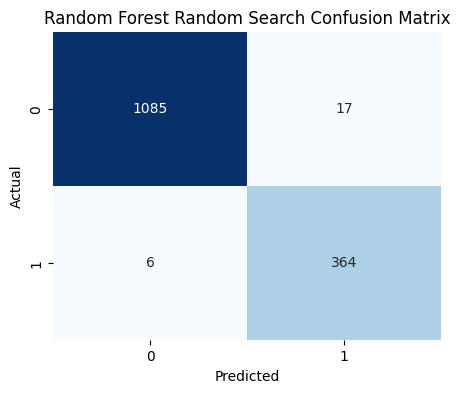

In [20]:
# Prediksi pada test set menggunakan model terbaik
y_pred_rf_random = best_rf_random.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf_random)
precision = precision_score(y_test, y_pred_rf_random)
recall = recall_score(y_test, y_pred_rf_random)
f1 = f1_score(y_test, y_pred_rf_random)

cm_rf = confusion_matrix(y_test, y_pred_rf_random)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_random))

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Random Search Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.96128
Precision: 0.90649
Recall: 0.94324
F1 Score: 0.92450

Confusion Matrix:
[[1066   36]
 [  21  349]]


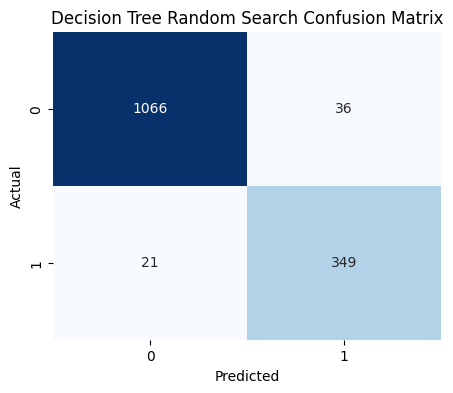

In [21]:
# Prediksi pada test set menggunakan model terbaik
y_pred_dt_random = best_dt_random.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_dt_random)
precision = precision_score(y_test, y_pred_dt_random)
recall = recall_score(y_test, y_pred_dt_random)
f1 = f1_score(y_test, y_pred_dt_random)

cm_dt = confusion_matrix(y_test, y_pred_dt_random)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_random))

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Random Search Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluasi Bayesian Optimization

Accuracy: 0.98573
Precision: 0.96042
Recall: 0.98378
F1 Score: 0.97196

Confusion Matrix:
[[1087   15]
 [   6  364]]


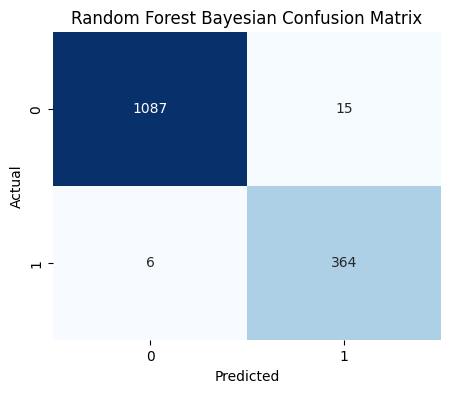

In [22]:
y_pred_rf_bayes = best_rf_bayes.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf_bayes)
precision = precision_score(y_test, y_pred_rf_bayes)
recall = recall_score(y_test, y_pred_rf_bayes)
f1 = f1_score(y_test, y_pred_rf_bayes)

cm_bayes = confusion_matrix(y_test, y_pred_rf_bayes)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_bayes))


plt.figure(figsize=(5, 4))
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Bayesian Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.97690
Precision: 0.95652
Recall: 0.95135
F1 Score: 0.95393

Confusion Matrix:
[[1086   16]
 [  18  352]]


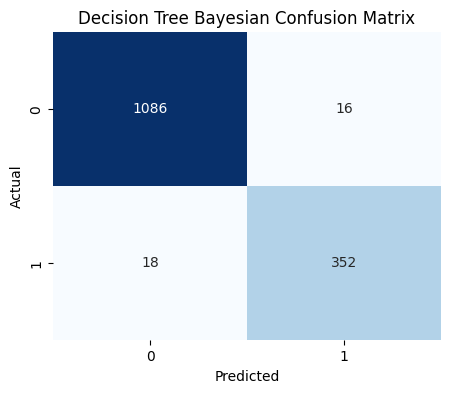

In [23]:
y_pred_dt_bayes = best_dt_bayes.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_dt_bayes)
precision = precision_score(y_test, y_pred_dt_bayes)
recall = recall_score(y_test, y_pred_dt_bayes)
f1 = f1_score(y_test, y_pred_dt_bayes)

cm_bayes = confusion_matrix(y_test, y_pred_dt_bayes)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_bayes))


plt.figure(figsize=(5, 4))
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Bayesian Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [24]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model sebelum dan sesudah tuning
results = {
    'DT Before Tuning': evaluate_model(dt, X_test, y_test),
    'DT After Random Search': evaluate_model(best_dt_random, X_test, y_test),
    'DT After Bayesian Optimization': evaluate_model(best_dt_bayes, X_test, y_test),
    'RF Before Tuning': evaluate_model(rf, X_test, y_test),
    'RF After Random Search': evaluate_model(best_rf_random, X_test, y_test),
    'RF After Bayesian Optimization': evaluate_model(best_rf_bayes, X_test, y_test),
}

# Konversi hasil evaluasi ke dalam DataFrame
summary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
    }
    for model_name, metrics in results.items()
])

# Tampilkan tabel perbandingan hasil
print(summary_df)


                            Model  Accuracy  Precision    Recall  F1-Score
0                DT Before Tuning  0.982337   0.959893  0.970270  0.965054
1          DT After Random Search  0.961277   0.906494  0.943243  0.924503
2  DT After Bayesian Optimization  0.976902   0.956522  0.951351  0.953930
3                RF Before Tuning  0.985054   0.957895  0.983784  0.970667
4          RF After Random Search  0.984375   0.955381  0.983784  0.969374
5  RF After Bayesian Optimization  0.985734   0.960422  0.983784  0.971963


Berdasarkan data evaluasi yang diperbarui, berikut adalah analisis untuk masing-masing model dengan mempertimbangkan metrik Accuracy, Precision, Recall, dan F1-Score:

### **Analisis Hasil Evaluasi Model**

1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 95.38%
   - **Precision**: 91.25%
   - **Recall**: 90.27%
   - **F1-Score**: 90.76%

   **Analisis**: KNN memiliki akurasi yang baik yaitu 95.38%. bahkan precision, recall, dan f1 score berada di angka yang terbilang baik. hal ini menunjukkan KNN cukup bisa untuk mengatasi klasifikasi ini, walaupun skor recal dan f1 score berada di score 90-an persen

2. **Decision Tree (DT)**
   - **Accuracy**: 98.23%
   - **Precision**: 95.59% 
   - **Recall**: 97.02%
   - **F1-Score**: 96.50%

   **Analisis**: Decision Tree memiliki akurasi yang sangat baik ketimbang KNN dan NB. dengan accuracy 98.23% menunjukkan akurasi yang hampir sempurna. bahkan precision, recall, dan f1 score tidak beda jauh dari accuracy nya. ini menunjukkan model DT sangat kuat untuk mengklasifikasikan data ini dengan minim kesalahan

3. **Random Forest (RF)**
   - **Accuracy**: 98.50%
   - **Precision**: 95.78%
   - **Recall**: 98.37%
   - **F1-Score**: 97.06%

   **Analisis**: Random Forest tidak jauh berbeda dengan DT. memiliki accuracy di angka 98% membuatnya sangat powerful. metrik Precision, recall, dan f1 score pun menunjukkan angka yang hampir sama dengan DT. jika dilihat secara seksama Random Forest lebih unggul dari Decision Tree

4. **Support Vector Machine (SVM)**
   - **Accuracy**: 97.07%
   - **Precision**: 93.36%
   - **Recall**: 95.13%
   - **F1-Score**: 94.24%

   **Analisis**: SVM memiliki akurasi yang lebih tinggi dari KNN dan NB (97.07%). kelemahan model ini ada di precision yang menunujukkan angka terndah dari metrik yang lain yaitu 93.36%. namun tetap terbilang angka yang sangat baik. model ini juga bisa terbilang baik untuk mengklasifikasikan model ini 

5. **Naive Bayes (NB)**
   - **Accuracy**: 94.83%
   - **Precision**: 86.93%
   - **Recall**: 93.51%
   - **F1-Score**: 90.10%

   **Analisis**: Naive Bayes memiliki skor precision paling rendah dari model yang lain, hal ini menunjukkan model ini sangat lemah dari presisi dibandingkan model yang lain. walaupun Accuracy, Recall, dan f1 score menunjukkan angka di atas 90-an persen. model ini masih bisa digunakan jika tidak melihat model dengan score yang sangat optimal atau sangat bagus

### **Kesimpulan dari pemodelan tanpa tuning:**
**Random Forest** adalah model dengan **akurasi tertinggi** (98.50%) dan **precision yang sangat baik** (95.78%). Di dukung dengan Recall dan F1-Score yang menunjukkan score yang sangat baik. model ini bisa di jadikan pilihan terbaik dalam kasus klasifikasi pada data ini. Walaupun model yang lain juga sangat memungkinkan di gunakan seperti Decision Tree, SVM, dll. Jika dilihat dari hasil evaluasi ini, saya mengambil 2 model untuk dilakukan Hyperparameter Tuning yaitu model Random Forest dan Decision Tree. hal ini saya ambil karena 2 model ini menunjukkan angka yang sangat baik dari model yang lain.

### **Analisis Setelah Hyperparameter Tuning**

1. **Decision Tree - RandomSearchCV**
   - **Accuracy**: 96.12%
   - **Precision**: 90.64%
   - **Recall**: 94.32%
   - **F1-Score**: 92.45%

   **Analisis**: Decision Tree setealh dilakukan tuning menggunakan RandomSearch, menunjukkan hasil yang menurun ketimbang pemodelan sebelumnya. dapat ditarik kesimpulan tidak ada perubahan signifikan yang terjadi setelah melakukan Hyperparameter tuning pada Decision Tree menggunakan RandomSearch

2. **Decision Tree - Bayesian Optimization**
   - **Accuracy**: 97.69%
   - **Precision**: 95.65%
   - **Recall**: 95.13%
   - **F1-Score**: 95.39%

   **Analisis**: setelah di tuning menggunakan bayesian juga tidak menunjukkan hasil yang signifikan, malah membuat metrik turun kurang lebih 1%.

3. **Random Forest - RandomSearchCV**
   - **Accuracy**: 98.43%
   - **Precision**: 95.53%
   - **Recall**: 98.37%
   - **F1-Score**: 96.93%

   **Analisis**: Random Forest setelah dilakukan tuning menggunakan RandomSearch memberikan hasil metrik evaluasi yang tidak jauh dari model sebelum tuning. tidak terjadi penurunan dan peningkatan secara signifikan. jika dilihat secara teliti, Random Forest setelah tuning menggunakan random search memiliki angka yang turun dari model sebelum tuning walaupun hanya 0.0 seperssekian persen.

4. **Random Forest - Bayesian Optimization**
   - **Accuracy**: 98.57%
   - **Precision**: 96.04%
   - **Recall**: 98.37%
   - **F1-Score**: 97.19%

   **Analisis**: sama seperti saat tuning menggunakan random search. Bayesian Optimization juga tidak memberikan peningkatan yang signifikan terhadap model Random Forest. 

### **Kesimpulan:**
**Random Forest - Bayesian Optimization** adalah model dengan **akurasi tertinggi**  (98.57%) dan **precision yang sangat baik** (96.04%) setelah tuning. Dengan menerapkan pruning pada ruang search untuk mendapatkan nilai yang terbaik. model ini sudah dilengkapi untuk mengatasi overfitting ketimbang menggunakan model Random Forest sebelum tuning yang bisa jadi menyebabkan overfitting yang sangat jauh. 

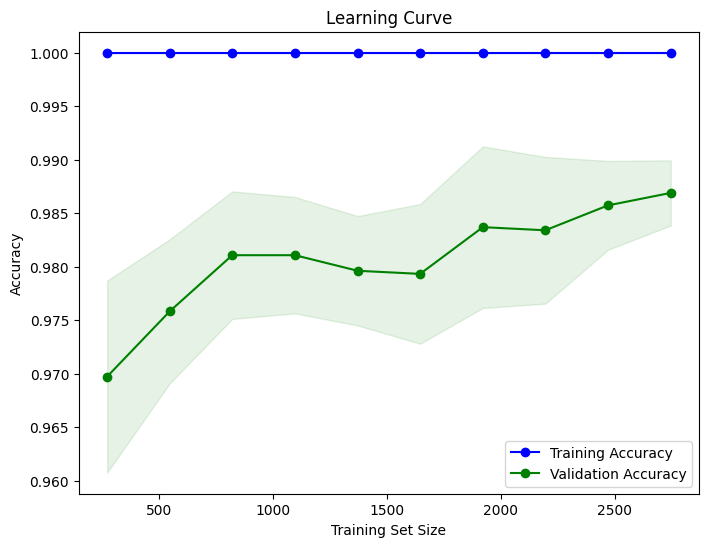

In [27]:
# 3. Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_bayes, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# 4. Hitung rata-rata dan standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 5. Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### **Rekomendasi Tindakan Lanjutan**

Jika dilihat dari learning curve, model memiliki gap yang cukup jauh walupun tidak terlalu jauh. di sarankan unutk mengatasi overfitting menggunakan berbagai teknik seperti regularization dan pruning lebih pada hyperparameter tuning.